In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\\personel practise\\avocado.csv')

In [3]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
df.Date = df.Date.apply(pd.to_datetime)

In [6]:
df.type = df.type.map({'conventional':0,'organic':1})

In [7]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany


In [8]:
df['Month'] = df.Date.apply(lambda x:x.month)

In [9]:
df.drop('Date',inplace=True,axis=1)

In [10]:
df.head(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12


In [11]:
x = df.iloc[:,2:9]
y = df.iloc[:,1]

In [12]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69


In [13]:
x.shape

(18249, 7)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [15]:
y_test

9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
17389    1.70
16636    1.51
7645     1.44
11356    1.35
3016     1.28
Name: AveragePrice, Length: 5475, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred1 = regressor1.predict(x_test)

In [18]:
y_pred1

array([1.4203464 , 1.42188877, 1.39596483, ..., 1.42292748, 1.4193689 ,
       1.44598976])

In [19]:
y_test

9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
17389    1.70
16636    1.51
7645     1.44
11356    1.35
3016     1.28
Name: AveragePrice, Length: 5475, dtype: float64

In [20]:
x = np.append(arr=np.ones((18249,1)).astype(int),values=x,axis=1)

In [21]:
x

array([[1.0000000e+00, 6.4236620e+04, 1.0367400e+03, ..., 8.6968700e+03,
        8.6036200e+03, 9.3250000e+01],
       [1.0000000e+00, 5.4876980e+04, 6.7428000e+02, ..., 9.5055600e+03,
        9.4080700e+03, 9.7490000e+01],
       [1.0000000e+00, 1.1822022e+05, 7.9470000e+02, ..., 8.1453500e+03,
        8.0422100e+03, 1.0314000e+02],
       ...,
       [1.0000000e+00, 1.3766760e+04, 1.1919200e+03, ..., 9.3941100e+03,
        9.3518000e+03, 4.2310000e+01],
       [1.0000000e+00, 1.6205220e+04, 1.5276300e+03, ..., 1.0969540e+04,
        1.0919540e+04, 5.0000000e+01],
       [1.0000000e+00, 1.7489580e+04, 2.8947700e+03, ..., 1.2014150e+04,
        1.1988140e+04, 2.6010000e+01]])

In [22]:
x.ndim

2

In [23]:
import statsmodels.api as sm

In [24]:
x_opt = x[:,[0,1,2,3,4,5,6,7]]
regressor_ols = sm.OLS(endog=y,exog=x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     141.7
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          2.73e-204
Time:                        18:33:39   Log-Likelihood:                -8810.9
No. Observations:               18249   AIC:                         1.764e+04
Df Residuals:                   18241   BIC:                         1.770e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4231      0.003    474.911      0.000       1.417       1.429
x1             0.0002   5.89e-05      2.904      0.004    5.56e-05       0.000
x2            -0.0002   5.89e-05     -2.906      0.004      -0.000   -5.57e-05
x3            -0.0002   5.89e-05     -2.903      0.004      -0.000   -5.55e-05
x4            -0.0002   5.89e-05     -2.912      0.004      -0.000   -5.61e-05
x5            -0.0002   5.89e-05     -2.880      0.004      -0.000   -5.42e-05
x6         -1.392e-06   3.13e-07     -4.449      0.000   -2.01e-06   -7.79e-07
x7          -1.53e-06   3.02e-07     -5.060      0.000   -2.12e-06   -9.37e-07
==============================================================================
Omnibus:                     1114.674   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1335.109
Skew:                           0.632   Prob(JB):                    1.22e-290
Kurtosis:                       3.400   Cond. No.                     4.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,2
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,1


In [49]:
X = df.iloc[:,2:3].values
Y = df.iloc[:,1].values

In [50]:
X

array([[ 64236.62],
       [ 54876.98],
       [118220.22],
       ...,
       [ 13766.76],
       [ 16205.22],
       [ 17489.58]])

In [51]:
Y.size

18249

In [52]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X,Y)

LinearRegression()

In [68]:
from sklearn.preprocessing import PolynomialFeatures
regressor_poly = PolynomialFeatures(degree=1)
X_poly = regressor_poly.fit_transform(X)

In [69]:
regressor_poly.fit(X_poly,Y)

PolynomialFeatures(degree=1)

In [70]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression()

In [71]:
lin_reg2.predict(regressor_poly.fit_transform([[64000]]))

array([1.42365788])

In [72]:
X

array([[ 64236.62],
       [ 54876.98],
       [118220.22],
       ...,
       [ 13766.76],
       [ 16205.22],
       [ 17489.58]])

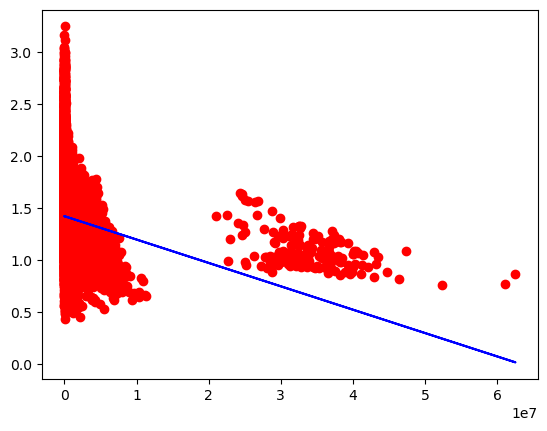

In [73]:
plt.scatter(X,Y,color='red')
plt.plot(X,regressor1.predict(X),color='blue')
plt.show()


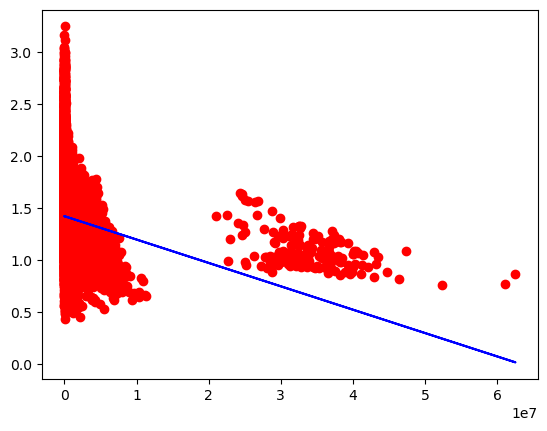

In [74]:
plt.scatter(X,Y,color='red')
plt.plot(X,lin_reg2.predict(regressor_poly.fit_transform(X)),color='blue')
plt.show()


In [75]:
from sklearn.svm import SVR
regressor2 = SVR()
regressor2.fit(X,Y)

SVR()

In [76]:
regressor2.predict([[64000]])

array([1.51139004])